In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import IBP

(80, 44)

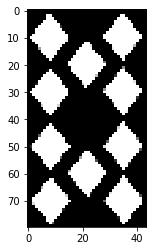

In [2]:
def to_black(path):
    fig = plt.imread(path)[:, :, :3]
    fig = np.mean(fig, axis = -1)
    #fig[fig < 0.5] = 0
    #fig[fig >= 0.5] = 1
    return 1 - fig

def flatten(fig):
    return fig.reshape(-1)

compress = to_black('poker/10D.png')[130:-130:10, 130:-130:10]
plt.imshow(compress, cmap = 'gray')
compress.shape

In [3]:
def get_diamond():
    num = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    paths = ['poker/' + n + 'D.png' for n in num]
    imgs = [to_black(path) for path in paths]
    new_img = np.zeros((1056,691))
    new_img[2:-2, 4:-4] = imgs[6]
    imgs[6] = new_img
    return np.stack([flatten(img[130:-130:10,130:-130:10]) for img in imgs])

In [4]:
def get_space():
    num = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    paths = ['poker/' + n + 'S.png' for n in num]
    imgs = [to_black(path) for path in paths]
    #print([img.shape for img in imgs])
    new_img = np.zeros((1056,691))
    new_img[2:-2, 4:-4] = imgs[5]
    imgs[5] = new_img
    return np.stack([flatten(img[130:-130:10,130:-130:10]) for img in imgs])

In [5]:
def get_club():
    num = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    paths = ['poker/' + n + 'C.png' for n in num]
    imgs = [to_black(path) for path in paths]
    #print([img.shape for img in imgs])
    new_img = np.zeros((1056,691))
    new_img[2:-2, 4:-4] = imgs[5]
    imgs[5] = new_img
    return np.stack([flatten(img[130:-130:10,130:-130:10]) for img in imgs])

In [6]:
def get_heart():
    num = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    paths = ['poker/' + n + 'H.png' for n in num]
    imgs = [to_black(path) for path in paths]
    return np.stack([flatten(img[130:-130:10,130:-130:10]) for img in imgs])

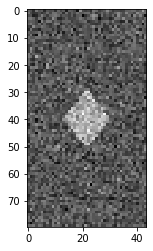

In [7]:
Xd = get_diamond()
X = np.tile(Xd, reps = (10, 1))
X += np.random.normal(0, 0.2, X.shape)
X.shape
plt.imshow(X[30].reshape(80, 44), cmap = "gray")

In [8]:
ibp = IBP.IBP(X, sigma_X = (0.15, 1, 1),sigma_A=(0.5, 1,1), alpha = (1, 1,1))
hist = ibp.MCMC(1000)

Current K = 14: 100%|██████████| 1000/1000 [17:36<00:00,  1.06s/it]


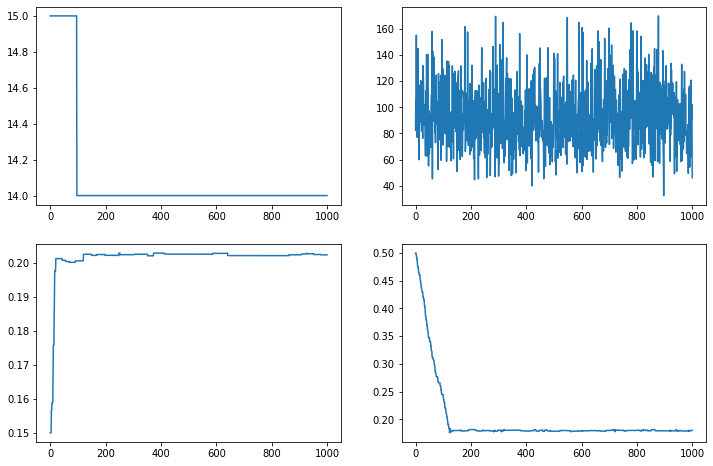

In [9]:
fig, ax = plt.subplots(2,2,figsize = (12,8))
ax[0,0].plot(hist['K'])
ax[0,1].plot(hist['alpha'])
ax[1,0].plot(hist['sigma_X'])
ax[1,1].plot(hist['sigma_A'])

In [10]:
A = ibp.postMean()
A_imgs = A.reshape(-1, 80, 44)

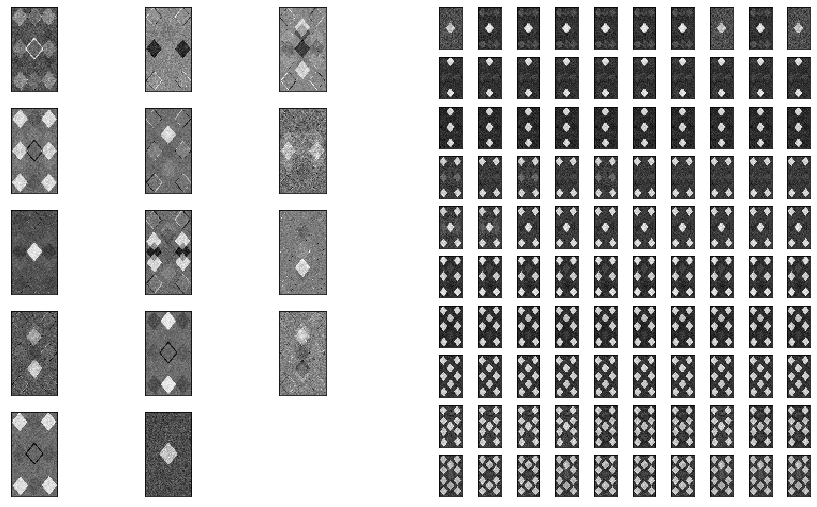

In [11]:
num = A_imgs.shape[0]
f = plt.figure(figsize = (15,9))
gs = gridspec.GridSpec(1, 2, figure = f)
gs0 = gridspec.GridSpecFromSubplotSpec(5, (num - 1) // 5 + 1, subplot_spec=gs[0])
for i in range(num):
    sp = f.add_subplot(gs0[i % 5, i // 5])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(A_imgs[i], cmap = 'gray')
X_imgs = (hist['Z'][-1] @ A).reshape(-1, 80, 44)
# X_imgs[X_imgs >= 0.5] = 1
# X_imgs[X_imgs < 0.5] = 0
gs1 = gridspec.GridSpecFromSubplotSpec(10, (X_imgs.shape[0] - 1) // 10 + 1, subplot_spec=gs[1])
for i in range(X_imgs.shape[0]):
    sp = f.add_subplot(gs1[i % 10, i // 10])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(X_imgs[i], cmap = 'gray')

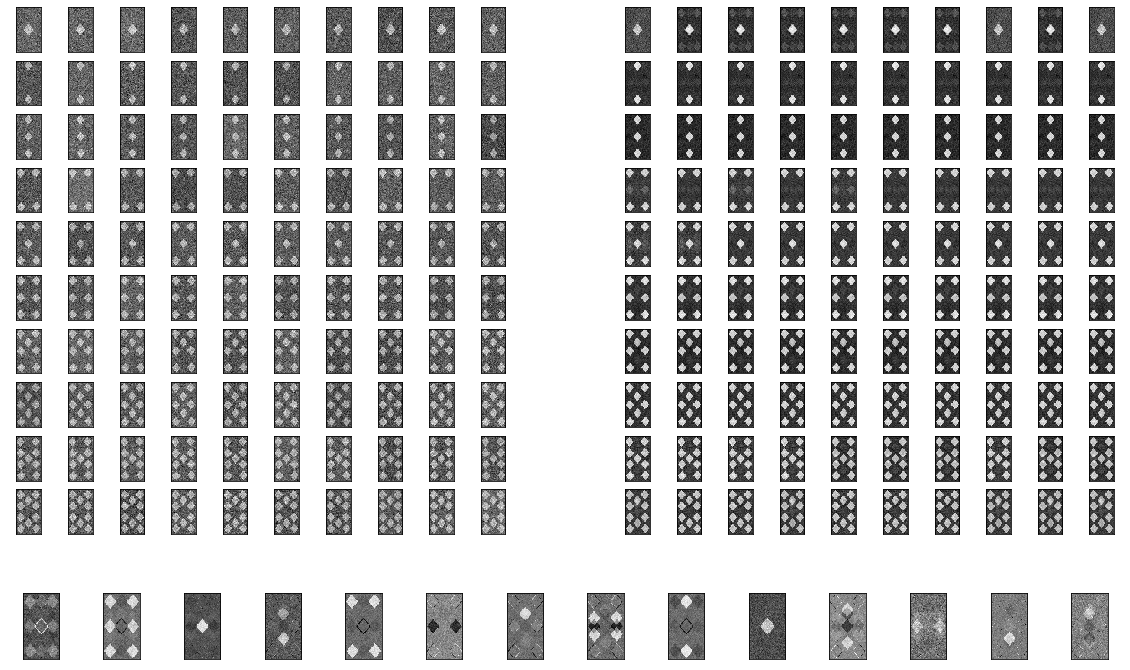

In [25]:
X_org = X.reshape(-1, 80, 44)
num = X_org.shape[0]
f = plt.figure(figsize = (20,12))
plt.axis('off')
g =  gridspec.GridSpec(2,1,figure = f, height_ratios=[8,1])
gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = g[0])
gs0 = gridspec.GridSpecFromSubplotSpec(10, (num - 1) // 10 + 1, subplot_spec=gs[0])
for i in range(num):
    sp = f.add_subplot(gs0[i % 10, i // 10])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(X_org[i], cmap = 'gray')
X_imgs = (hist['Z'][-1] @ A).reshape(-1, 80, 44)
# X_imgs[X_imgs >= 0.5] = 1
# X_imgs[X_imgs < 0.5] = 0

gs1 = gridspec.GridSpecFromSubplotSpec(10, (X_imgs.shape[0] - 1) // 10 + 1, subplot_spec=gs[1])
for i in range(X_imgs.shape[0]):
    sp = f.add_subplot(gs1[i % 10, i // 10])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(X_imgs[i], cmap = 'gray')

gsb = gridspec.GridSpecFromSubplotSpec(1, A_imgs.shape[0], subplot_spec=g[1])
for i in range(A_imgs.shape[0]):
    sp = f.add_subplot(gsb[0, i])
    sp.set_xticks([])
    sp.set_yticks([])
    sp.imshow(A_imgs[i], cmap = 'gray')

In [27]:
def feature_map(feature, X_prior, Z, shape):
    X_post = Z @ feature
    f = plt.figure(figsize = (20,12))
    grid = gridspec.GridSpec(nrows = (X_prior.shape[0] + 1), ncols = (feature.shape[0] + 2), figure = f)
    for idx in range(X_prior.shape[0]):
        sp = f.add_subplot(grid[idx + 1, 0])
        sp.set_xticks([])
        sp.set_yticks([])
        sp.imshow(X_prior[idx].reshape(shape), cmap = 'gray')

NameError: name 'ibp2' is not defined

In [26]:
print(hist['Z'][-1][:,-1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
